# TP Linear Regression

We have been contacted build a machine learning model to predict power output of a power
plant given a set of readings from various sensors in a gas-fired power generation plant.
We consider the following Combined Cycle Power Plant Dataset.

In [1]:
import pandas as pd
import numpy as np
import sklearn as skt
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
 #qd on a un doc excel avec plusieurs pages on fait ça :

powerData = pd.read_excel('Folds5x2_pp.xlsx', sheet_name=None) # None = all sheet
df = pd.concat(powerData, axis=0, ignore_index=True)

## Dataset understanding :

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47840 entries, 0 to 47839
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      47840 non-null  float64
 1   V       47840 non-null  float64
 2   AP      47840 non-null  float64
 3   RH      47840 non-null  float64
 4   PE      47840 non-null  float64
dtypes: float64(5)
memory usage: 1.8 MB


In [4]:
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [5]:
df.describe()

,AT,V,AP,RH,PE
count,47840.000000,47840.000000,47840.000000,47840.000000,47840.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452162,12.707362,5.938535,14.599658,17.066281
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


As we can see, our data is complete (count is the same for all variables), so we can begin our analyses.


We want to predict the power output of a gas-fired power generation plant based
on the readings from various sensors. So, we define X and y as the following way :

In [6]:
X = df[['AT', 'V', 'AP', 'RH']]
y = df[['PE']]

## Part 1: Linear Regression from Scratch 

In this first part, we shall build a linear regression model from scratch using linear algebra.


### NormalizeFeatures

In [7]:
#formule pour normaliser :
def z_score(X):
    mean = X.mean(axis = 0)
    std = X.std(axis=0)
    return (X-mean)/std

In [8]:
X_normalized = z_score(X)
X_normalized

,AT,V,AP,RH
0,-0.629513,-0.987286,1.820469,-0.009519
1,0.741901,0.681038,1.141851,-0.974610
2,-1.951277,-1.173005,-0.185076,1.289826
3,0.162204,0.237201,-0.508388,0.228158
4,-1.185056,-1.322525,-0.678463,1.596683
...,...,...,...,...
47835,-0.608043,-0.423833,-0.245697,-0.025958
47836,1.846279,1.860669,-0.498284,-0.930774
47837,-0.491298,-0.862949,0.158443,0.366517
47838,-0.268544,0.437872,0.895999,1.461748


In [9]:
#on ajoute une colonne 1 (dimension de la matrice X)
X_one = np.append(np.ones((X_normalized.shape[0],1), dtype=float), X_normalized, axis =1)
X_one

array([[ 1.        , -0.6295128 , -0.98728627,  1.82046937, -0.00951925],
       [ 1.        ,  0.74190135,  0.68103801,  1.14185087, -0.97461033],
       [ 1.        , -1.95127694, -1.17300539, -0.18507563,  1.28982622],
       ...,
       [ 1.        , -0.49129788, -0.86294889,  0.15844341,  0.36651694],
       [ 1.        , -0.26854372,  0.43787187,  0.895999  ,  1.46174805],
       [ 1.        ,  0.54061747, -0.23654034, -0.23559314, -0.14171413]])

In [10]:
#on normalise y grâce à la fct z_score
y_normalized = z_score(y)

## Train/Test split

In [11]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(X_one,y_normalized, test_size=0.5, random_state=122)
print("training test :", X_train.shape,y_train.shape)
print("testing test :", X_test.shape,y_test.shape)


training test : (23920, 5) (23920, 1)
testing test : (23920, 5) (23920, 1)


### Following parameters for cost function :


In [12]:
# w : vector of weights of the model
n = X.shape[1] #nb de colonnes de X
w = np.random.randn(n+1,1) 
m = X_train.shape[0]


In [13]:
w

array([[ 1.89732001],
       [-0.36092419],
       [ 0.32544557],
       [ 0.67503195],
       [ 0.68624704]])

## Linear Model

In [14]:
def model(X_train, w):
    return X_train.dot (w) # w ca correspond à b  donc ax+b 

## CostFunctions

In [15]:
def cost_function (w, X_train, y_train) :
    m = X_train.shape[0]
    return 1/(2*m)* np.sum((model(X_train,w)-y_train)**2)

In [16]:
Cost= cost_function (w, X_one, y_normalized)
Cost

PE    2.249154
dtype: float64

### Gradient Descent

In [17]:
def grad(w, X_train, y_train):
    m = X_train.shape[0]
    return 1/m * X_train.T.dot(model(X_train,w)-y_train)

In [18]:
learning_rate = 0.03 # faut trouver le learning rate le plus grand avant que ca diverge
#plus alpha est grand plus la courbe se rapproche de 0, mieux c'est

nb_iterations = 1000 # qd ce nb est trop grand, ca prend du temps à compiler

In [19]:
def gradient_descent(X_train, y_train, w, learning_rate,nb_iterations): #algo itératif
    cost_list = [] #répertorier tous les cost à chaque iteration
    cost_list.append(cost_function(w, X_train, y_train))
    for i in range (0, nb_iterations):
        w = w-learning_rate * grad (w, X_train, y_train)
        cost_list.append(cost_function(w, X_train, y_train))
    return w, cost_list

In [20]:
w_final, cost_list = gradient_descent(X_one, y_normalized, w, learning_rate, nb_iterations)
w_final

array([[ 1.34475282e-13],
       [-8.49286549e-01],
       [-1.84695944e-01],
       [ 2.42783790e-02],
       [-1.30575098e-01]])

In [21]:
#affichage des points de la droite jusu'au minimum de la fonction (convergence)
#cost_list

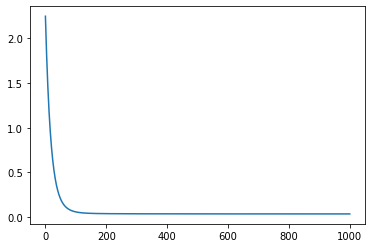

In [22]:
plt.plot(cost_list)

In [23]:
#Dénormalisation pour obtenir des valeurs réelles
predict = model(X_one, w_final)
predict = df.PE.std()*predict + df.PE.mean()
predict

array([[467.37677843],
       [444.11005718],
       [483.39356079],
       ...,
       [463.45493075],
       [453.99096628],
       [447.49298804]])

## Part 2: Compare to Scikit-Learn


### Normalization, Cost function and Gradient descent

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler  #permet de normaliser les donnéees

scaler = MinMaxScaler()

df[['AT', 'V', 'AP', 'RH']] = scaler.fit_transform(df[['AT', 'V', 'AP', 'RH']]) 

model = LinearRegression()

X = df[['AT', 'V', 'AP', 'RH']]
y = df['PE']

model.fit(X, y)  #linear regression : normalization + cost funtion + gradient descent
model.score(X, y) #qualité de prédiction du modèle 


0.9286960898122536

In [25]:
prediction = model.predict(X)
prediction

array([467.26978996, 444.0773659 , 483.56264263, ..., 463.38288783,
       453.9782158 , 447.34132467])

### Add the following functions to your library : R2, MAE, RMSE

#### R - squared
R² is a measure of the quality of the prediction of a linear regression. 
This coefficient is between 0 and 1, and increases with the adequacy of the regression to the model

In [26]:
from sklearn.metrics import r2_score

prediction = model.predict(X)
r2_score(y, prediction)

0.9286960898122536

#### MAE and RMSE 

**Mean Absolute Error : MAE** measures the average over the test sample of the absolute differences between prediction and actual observation where all individual differences have equal weight.

**Root Mean Squared Error : RMSE** provides an indication of the dispersion or variability in the quality of the prediction.
RMSE is a quadratic scoring rule that also measures the average magnitude of the error. It’s the square root of the average of squared differences between prediction and actual observation.

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print("MAE : " + str(mean_absolute_error(y, prediction)))
print("RMSE : "  + str(mean_squared_error(y, prediction, squared=False))) #"squared=false" pour obtenir le RMSE et non pas le MSE

MAE : 3.6252158076011822
RMSE : 4.557126016749484


#### Use LinearRegression from sklearn.linear_model to build a new linear model

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
model1 = LinearRegression()

#train, test = train_test_split()
model1.fit(X_train, y_train) #entrainement

train_score = model1.score(X_train, y_train) 
test_score = model1.score(X_test, y_test)

print("train score : ", train_score)
print("test score : ", test_score)

model_coefs = (model1.coef_, model1.intercept_)


train score :  0.9274582751625199
test score :  0.9299029622119308


### Compare the obtained R2, MAE, RMSE

> We have **R2 = 0.92** which is close to 1, this means that the observations are grouped around the regression line, and therefore the prediction errors are low.


> We have **MAE = 3.62** implies that, on average, the forecast's distance from the true value is 3.62

From an interpretation standpoint, MAE is better than RMSE because RMSE does not describe average error alone and has other implications that are more difficult to tease out and understand.

On the other hand, unlike MAE, RMSE avoids the use of taking the absolute value, which is undesirable in many mathematical calculations.

## Part 3 : Normal Equation


In [29]:
def nequation(X,y):
    X_T_X=X.transpose().dot(X)
    w_normal= np.linalg.inv(X_T_X).dot (X.transpose()).dot(y) #calculating inverse
    return w_normal

In [30]:
w_normal = nequation(X,y)
w_normal

array([ 347.89147882, -122.50407501,  332.7972217 ,  262.84215518])

In [31]:
predict = X@w_normal #multiplication de matrices
predict

0        518.378702
1        490.055010
2        395.201477
3        440.936214
4        447.271297
            ...    
47835    402.452874
47836    460.529982
47837    463.144240
47838    535.882098
47839    476.165863
Length: 47840, dtype: float64